<a href="https://colab.research.google.com/github/RawanKhaled20/Bharat_Machine_learning/blob/main/Wine_quality_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rawankhaled20","key":"f5a17aecb67ca4675b425dadbe4ab60e"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets list

ref                                                        title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          23365        710  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset         Customer Shopping Trends Dataset              146KB  2023-10-05 06:45:37            913         34  1.0              
willianoliveiragibin/diabetesdataanslysis                  diabetesDataAnslysis                            9KB  2023-09-27 19:54:22            812         24  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023  Credit Card Fraud Detection Dataset 2023      143MB  202

In [6]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 63.8MB/s]


In [7]:
! unzip red-wine-quality-cortez-et-al-2009.zip

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt

In [75]:
dataset=pd.read_csv("winequality-red.csv")

In [76]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [77]:
# Count NaN values in each column
nan_count_per_column = dataset.isna().sum()

# Count total NaN values in the entire DataFrame
total_nan_count = dataset.isna().sum().sum()

print("NaN values per column:")
print(nan_count_per_column)

print("\nTotal NaN values in the DataFrame:", total_nan_count)

NaN values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total NaN values in the DataFrame: 0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [78]:
# Determine the features and labels
x= dataset.iloc[:, :11]
y= dataset.iloc[:,11]

In [79]:
#split dataset
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [80]:
# You can check their dimensions to verify:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (1279, 11)
y_train shape: (1279,)


In [81]:
#train the model
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [82]:
#test the model
prediction=model.predict(x_test)
# Convert the predicted values to integers rounded to the nearest integer
#prediction = prediction.round().astype(int)

In [83]:
print(prediction)

[5.34666441 5.05631345 5.66446972 5.46451484 5.72518476 5.27928659
 5.03421667 5.12623347 5.74534288 5.68665032 6.13959677 5.23386892
 5.54991474 5.25825299 5.44810502 6.46828999 5.15018088 5.59105157
 6.5560658  5.32255751 5.3918385  5.19610791 5.94475739 6.36197631
 5.35484893 5.41907575 6.36483321 5.35121573 5.172392   6.16987311
 5.25263058 5.50657406 5.75422105 5.39101712 5.45331031 5.02757499
 6.16173243 5.68661555 5.6486077  6.165471   5.52872593 5.24414488
 6.17724727 5.16500868 5.87598332 5.81317121 6.41982782 5.6059474
 5.15232137 5.55634632 5.16044852 5.10449459 5.58371721 6.33425313
 4.95134985 4.98364804 6.01041999 5.40809804 5.83802638 5.2486897
 5.60717482 5.96630957 5.27619063 5.30380113 6.4949309  5.42033967
 6.34273471 5.24618531 6.41317317 5.31237924 6.41746963 4.74315748
 5.79362039 5.8283184  6.17598768 5.29723707 6.76198733 5.89745261
 6.07833712 6.43522754 5.29499011 6.4546625  5.45007864 5.69644693
 5.72368681 6.41233601 5.31025119 5.84548953 6.31433877 5.205850

In [84]:
print(y_test)

803     6
124     5
350     6
682     5
1326    6
       ..
1259    6
1295    5
1155    5
963     6
704     4
Name: quality, Length: 320, dtype: int64


In [85]:
# Calculate the R-squared (R²) score on the test data
r_squared = model.score(x_test, y_test)

print("R-squared (R²) Score:", r_squared)

R-squared (R²) Score: 0.4031803412796231


In [86]:
mse=mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
print('the mean square value is: ', mse)
print('the root mean square value is: ', rmse)

the mean square value is:  0.39002514396395416
the root mean square value is:  0.6245199307980124


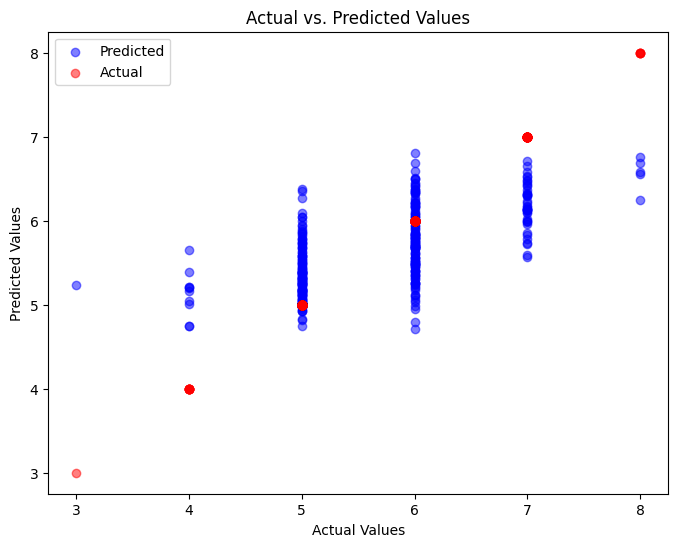

In [87]:
#plot the relation between the actual test values and the predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction , c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [35]:
#Try a different approach
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming that your target variable (the column you want to predict) is in 'target_column'
target_column = 'quality'  # Replace with the actual column name

# Extract features (X) and labels (y)
X = dataset.drop(target_column, axis=1)  # Features
y = dataset[target_column]  # Labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an SVR regressor
svm_regressor = SVR(kernel='linear', C=1.0)

# Train the SVR model on the training data
svm_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root mean square:", rmse)

Mean Squared Error: 0.3934463578840382
Root mean square: 1109    2.449490
1032    2.236068
1002    2.645751
487     2.449490
979     2.236068
          ...   
794     2.449490
813     2.000000
1322    2.236068
704     2.000000
1023    2.449490
Name: quality, Length: 320, dtype: float64


In [36]:
# Calculate the R-squared (R²) score on the test data
r_squared = model.score(X_test, y_test)

print("R-squared (R²) Score:", r_squared)

R-squared (R²) Score: 0.3454811224101516


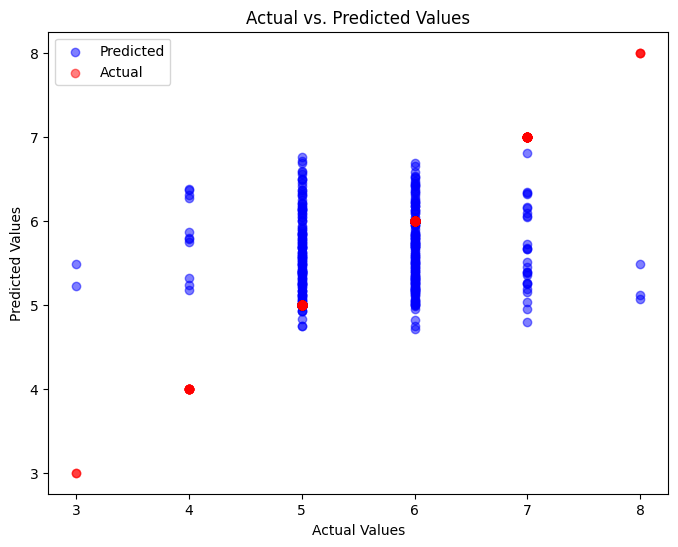

In [34]:
#plot the relation between the actual test values and the predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction , c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming that your target variable (the column you want to predict) is in 'target_column'
target_column = 'quality'  # Replace with the actual column name

# Extract features (X) and labels (y)
X = dataset.drop(target_column, axis=1)  # Features
y = dataset[target_column]  # Labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the KNN model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.5342499999999999
Root Mean Squared Error: 1109    2.449490
1032    2.236068
1002    2.645751
487     2.449490
979     2.236068
          ...   
794     2.449490
813     2.000000
1322    2.236068
704     2.000000
1023    2.449490
Name: quality, Length: 320, dtype: float64


In [41]:
# Calculate the R-squared (R²) score on the test data
r_s = model.score(X_test, y_test)

print("R-squared (R²) Score:", r_s)

R-squared (R²) Score: 0.3454811224101516


In [62]:
from sklearn.linear_model import Ridge

# Assuming that your target variable (the column you want to predict) is in 'target_column'
target_column = 'quality'  # Replace with the actual column name

# Extract features (X) and labels (y)
X = dataset.drop(target_column, axis=1)  # Features
y = dataset[target_column]  # Labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Ridge regression model with regularization parameter alpha
ridge_reg = Ridge(alpha=1.0)  # You can adjust the value of alpha

# Train the Ridge regression model on the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R²) Score:", r_squared)"""

Mean Squared Error: 0.3826365965387774
R-squared (R²) Score: 0.331593526346455


In [63]:
# Calculate the R-squared (R²) score on the test data
r_s = model.score(X_test, y_test)

print("R-squared (R²) Score:", r_s)

R-squared (R²) Score: 0.3454811224101516


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Assuming that your target variable (the column you want to predict) is in 'target_column'
target_column = 'quality'  # Replace with the actual column name

# Extract features (X) and labels (y)
X = dataset.drop(target_column, axis=1)  # Features
y = dataset[target_column]  # Labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Ridge regression model with regularization parameter alpha
ridge_reg = Ridge(alpha=1.0)  # You can adjust the value of alpha

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='r2')  # You can choose a different scoring metric

# Train the Ridge regression model on the full training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R²) Score:", r_squared)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Mean Squared Error: 0.3826365965387774
R-squared (R²) Score: 0.331593526346455
Cross-Validation Scores: [0.26255461 0.34163478 0.28321061 0.42618353 0.38627293]
Mean Cross-Validation Score: 0.3399712937937952


<Axes: >

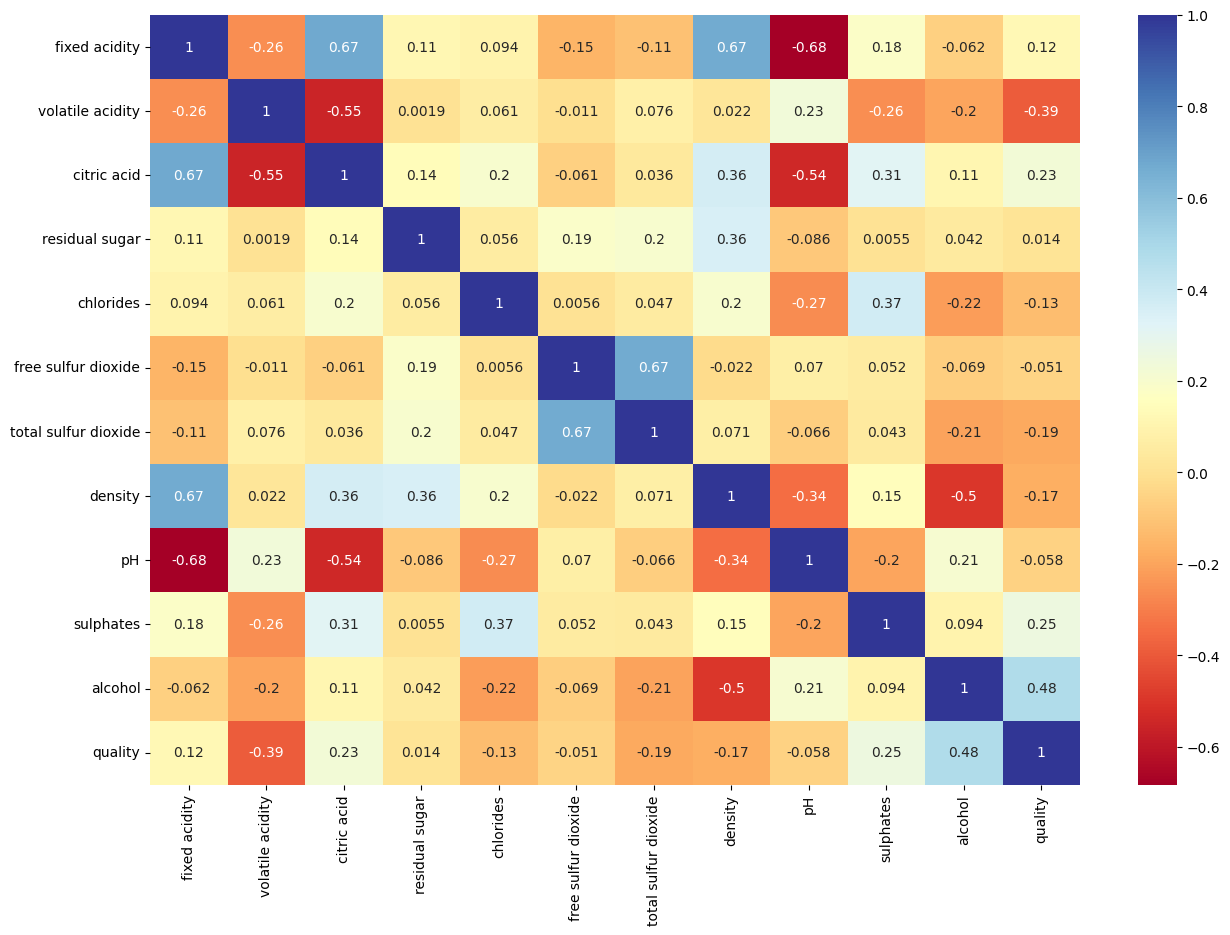

In [88]:
import seaborn as sns

#Plot corrolation between the features and MEDV
plt.figure(figsize =(15,10))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlBu")

In [89]:
X = dataset.drop(['pH', 'residual sugar', 'free sulfur dioxide'], axis=1)

In [90]:
print(dataset.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [91]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


In [99]:
# Determine the features and labels
x= X.iloc[:, :8]
y= dataset.iloc[:,11]

In [100]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [101]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [106]:
predict=model.predict(x_test)
predict = predict.round().astype(int)
print(predict)

[6 5 7 5 6 5 5 6 5 5 5 5 6 5 6 6 7 6 6 5 6 5 6 6 6 5 5 6 5 6 6 6 6 5 6 6 5
 6 6 6 5 6 7 7 6 5 5 6 6 6 5 5 6 6 6 5 5 5 7 5 5 6 6 6 5 6 5 6 6 6 5 5 5 6
 6 6 5 5 6 6 6 5 6 6 5 5 6 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 6 6 6 6 6 5 6 5 5 6 6 5 5 6 6 5 5 6 6 6 5 6 5 6 5 6 5 5 5 6 6 6 6
 6 5 6 6 5 6 6 5 5 5 6 6 6 6 6 5 6 5 6 7 5 6 6 6 5 7 6 6 6 7 6 5 5 7 5 6 7
 5 6 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 6 5 6 5 5 6 6 6 5 5 6
 6 6 5 6 6 6 5 5 5 6 5 6 6 6 6 7 7 6 5 5 5 5 6 5 6 5 5 6 5 5 5 5 6 6 5 5 5
 6 5 7 5 6 5 5 5 5 6 6 6 6 6 6 6 6 6 5 7 6 5 7 6 6 6 5 6 5 6 6 6 5 6 5 5 6
 6 5 5 5 6 5 5 6 6 6 5 5 6 5 6 6 5 5 5 7 6 6 5 6]


In [107]:
# Calculate the R-squared (R²) score on the test data
r_squared = model.score(x_test, y_test)

print("R-squared (R²) Score:", r_squared)

R-squared (R²) Score: 0.3221670044883288


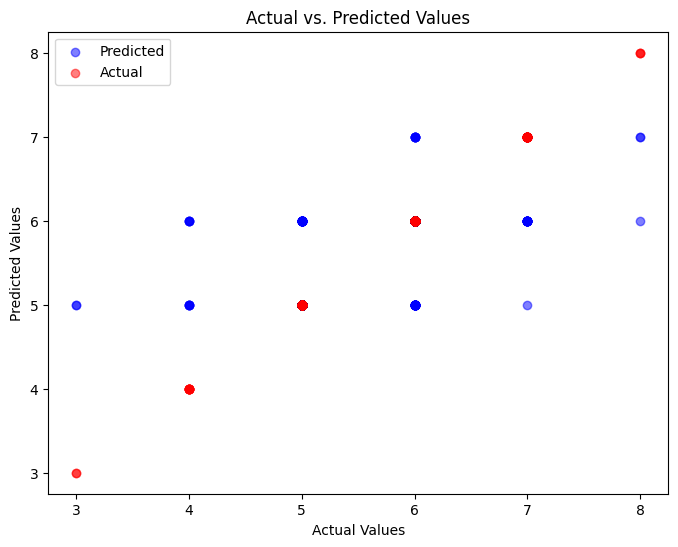

In [108]:
#plot the relation between the actual test values and the predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predict , c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [109]:
y_test

1109    6
1032    5
1002    7
487     6
979     5
       ..
794     6
813     4
1322    5
704     4
1023    6
Name: quality, Length: 320, dtype: int64

In [110]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.659375


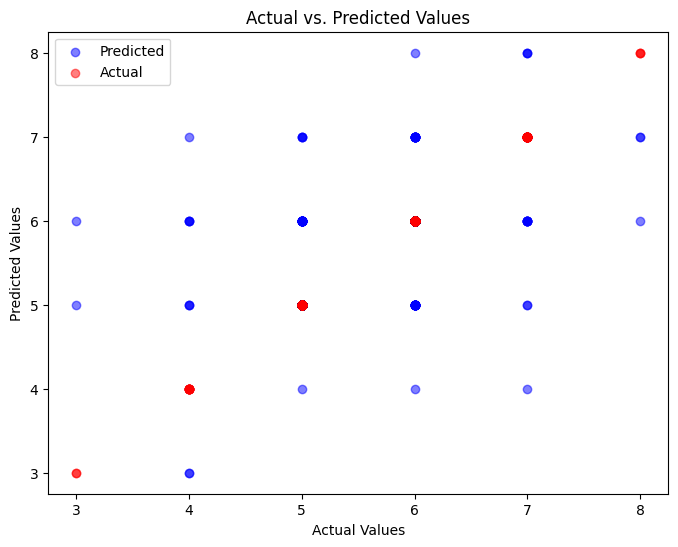

In [111]:
#plot the relation between the actual test values and the predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred , c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

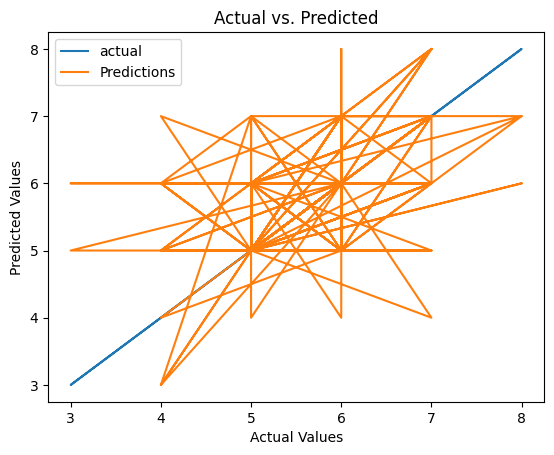

In [115]:
# Assuming the index of test_set represents time or sequence
plt.plot(y_test, y_test, label='actual')
plt.plot(y_test, y_pred, label='Predictions')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs. Predicted')
plt.show()